# Oil/gas field prediction
Determine the location of the development of oil and gas fields

Columns
Каждое месторождение обладает 19 параметрами:

- Field name - название месторождения
- Reservoir unit - юнит месторождения
- Country - страна расположения
- Region - регион расположения
- Basin name - название бассейна пород
- Tectonic regime - тектонический режим
- Latitude - широта
- Longitude - долгота
- Operator company - название компании
- Onshore or oﬀshore - на суше или нет
- Hydrocarbon type (main) - тип углеводорода
- Reservoir status (current) - статус месторождения
- Structural setting - структурные свойства
- Depth (top reservoir ft TVD) - глубина
- Reservoir period - литологический период
- Lithology (main) - литология
- Thickness (gross average ft) - общая толщина
- Thickness (net pay average ft) - эффективная толщина
- Porosity (matrix average 20. Permeability (air average mD) – проницаемость

## Imports and data reading

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [30]:
train = pd.read_csv('data/train_oil.csv')
test = pd.read_csv('data/oil_test.csv')

In [7]:
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


## EDA

Let's drop useless columns

In [31]:
train.drop(columns=['Operator company', 'Field name', 'Country', 
                   'Reservoir unit', 'Basin name'], inplace=True)
test.drop(columns=['Operator company', 'Field name', 'Country',
                   'Reservoir unit', 'Basin name'], inplace=True)

In [9]:
train.head(5)

,Region,Tectonic regime,Latitude,Longitude,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,FORMER SOVIET UNION,COMPRESSION/EVAPORITE,51.0000,44.8042,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LATIN AMERICA,EXTENSION,-19.6017,-39.8332,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,MIDDLE EAST,COMPRESSION/EVAPORITE,26.0800,49.8100,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,EUROPE,EXTENSION,61.3833,1.7500,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,NORTH AMERICA,COMPRESSION,53.2287,-115.8008,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [10]:
test.head(5)

,Region,Tectonic regime,Latitude,Longitude,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,AFRICA,EXTENSION,29.7422,28.4925,GAS-CONDENSATE,MATURE PRODUCTION,RIFT,10282,CRETACEOUS,SANDSTONE,745.0,144.0,10.0,8.0
1,AFRICA,STRIKE-SLIP/TRANSTENSION/SHALE/EVAPORITE/BASEM...,31.4382,31.3616,GAS,DECLINING PRODUCTION,WRENCH/DELTA,10499,NEOGENE,SANDSTONE,509.0,410.0,20.0,300.0
2,FORMER SOVIET UNION,COMPRESSION/EVAPORITE,48.4740,57.6667,OIL,DEVELOPING,SUB-SALT/FORELAND,6000,CARBONIFEROUS,LIMESTONE,300.0,105.0,10.0,20.0
3,EUROPE,INVERSION/COMPRESSION/EXTENSION,60.7833,1.7333,OIL,NEARLY DEPLETED,RIFT,9790,JURASSIC,SANDSTONE,886.0,344.0,17.0,500.0
4,FAR EAST,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,21.6000,72.9167,OIL,MATURE PRODUCTION,WRENCH/RIFT,2950,PALEOGENE,SANDSTONE,670.0,0.0,21.0,250.0


Now we need to encode all columns

For Region and Reservoir status we can use `LabelEncoder`, but for other columns we try to use `get_dummies` method

In [32]:
categ_columns = ['Region', 'Reservoir status']

for column in categ_columns:
    
    le = LabelEncoder()

    fit_by = pd.Series([i for i in train[column].unique() if type(i) == str])
    le.fit(fit_by)

    train[column] = train[column].apply(lambda x: le.transform([x])[0] if type(x) == str else x)
    test[column] = test[column].apply(lambda x: le.transform([x])[0] if type(x) == str else x)
    
le = LabelEncoder()

fit_by = pd.Series([i for i in train['Onshore/Offshore'].unique() if type(i) == str])
le.fit(fit_by)

train['Onshore/Offshore'] = train['Onshore/Offshore'].apply(lambda x: le.transform([x])[0] if type(x) == str else x)

In [33]:
# train data
tmp = train.copy()
tmp = tmp['Tectonic regime'].str.get_dummies('/').add_prefix('regime_').reset_index(drop=True)
train_full = pd.concat([train, tmp], axis=1)
train_full.drop(columns=['Tectonic regime'], inplace=True)

tmp = train.copy()
tmp = tmp['Structural setting'].str.get_dummies('/').add_prefix('Structural setting_').reset_index(drop=True)
train_full = pd.concat([train_full, tmp], axis=1)
train_full.drop(columns=['Structural setting'], inplace=True)

In [34]:
train_full = pd.get_dummies(train_full, columns=['Hydrocarbon type', 'Reservoir period', 'Lithology'])
train_full.shape

(309, 78)

In [35]:
# test data
tmp = test.copy()
tmp = tmp['Tectonic regime'].str.get_dummies('/').add_prefix('regime_').reset_index(drop=True)
test_full = pd.concat([test, tmp], axis=1)
test_full.drop(columns=['Tectonic regime'], inplace=True)

tmp = test.copy()
tmp = tmp['Structural setting'].str.get_dummies('/').add_prefix('Structural setting_').reset_index(drop=True)
test_full = pd.concat([test_full, tmp], axis=1)
test_full.drop(columns=['Structural setting'], inplace=True)

In [36]:
test_full = pd.get_dummies(test_full, columns=['Hydrocarbon type', 'Reservoir period', 'Lithology'])
test_full.shape

(133, 79)

Test and train datasets have some different columns cause of one dataset have some values that other don't have

In [37]:
cols = set(train_full.columns) & set(test_full.columns)
len(cols)

67

In [38]:
cols

{'Depth',
 'Hydrocarbon type_GAS',
 'Hydrocarbon type_GAS-CONDENSATE',
 'Hydrocarbon type_OIL',
 'Latitude',
 'Lithology_CHALK',
 'Lithology_CHALKY LIMESTONE',
 'Lithology_CONGLOMERATE',
 'Lithology_DOLOMITE',
 'Lithology_DOLOMITIC LIMESTONE',
 'Lithology_LIMESTONE',
 'Lithology_LOW-RESISTIVITY SANDSTONE',
 'Lithology_SANDSTONE',
 'Lithology_SHALY SANDSTONE',
 'Lithology_SILTSTONE',
 'Lithology_THINLY-BEDDED SANDSTONE',
 'Lithology_VOLCANICS',
 'Longitude',
 'Permeability',
 'Porosity',
 'Region',
 'Reservoir period_CARBONIFEROUS',
 'Reservoir period_CARBONIFEROUS-PERMIAN',
 'Reservoir period_CRETACEOUS',
 'Reservoir period_CRETACEOUS-PALEOGENE',
 'Reservoir period_DEVONIAN',
 'Reservoir period_JURASSIC',
 'Reservoir period_NEOGENE',
 'Reservoir period_ORDOVICIAN',
 'Reservoir period_PALEOGENE',
 'Reservoir period_PALEOGENE-NEOGENE',
 'Reservoir period_PERMIAN',
 'Reservoir period_PROTEROZOIC',
 'Reservoir period_SILURIAN',
 'Reservoir period_TRIASSIC',
 'Reservoir period_TRIASSIC-JURA

In [39]:
y = train_full['Onshore/Offshore']
train_full = train_full[cols]
test_full = test_full[cols]
print(train_full.shape)
print(test_full.shape)

(309, 67)
(133, 67)


C:\Users\user\AppData\Local\Temp\ipykernel_25472\1768314546.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_full = train_full[cols]
C:\Users\user\AppData\Local\Temp\ipykernel_25472\1768314546.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_full = test_full[cols]


In [40]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 67 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Hydrocarbon type_OIL                    309 non-null    uint8  
 1   Lithology_SILTSTONE                     309 non-null    uint8  
 2   regime_INVERSION                        309 non-null    int64  
 3   regime_EROSION                          309 non-null    int64  
 4   Structural setting_SALT                 309 non-null    int64  
 5   Structural setting_SUB-THRUST           309 non-null    int64  
 6   Reservoir period_TRIASSIC-JURASSIC      309 non-null    uint8  
 7   regime_SHALE                            309 non-null    int64  
 8   Reservoir period_PALEOGENE-NEOGENE      309 non-null    uint8  
 9   regime_LINKED                           309 non-null    int64  
 10  Reservoir period_TRIASSIC               309 non-null    uint8 

Finnaly we got **67** columns

#### Missing data

In [41]:
# проверим на пропуски
print("Number of missing values in train dataset:")
print(train_full.isna().sum())
print("Number of missing values in test dataset:")
print(test_full.isna().sum())

Number of missing values in train dataset:
Hydrocarbon type_OIL            0
Lithology_SILTSTONE             0
regime_INVERSION                0
regime_EROSION                  0
Structural setting_SALT         0
                               ..
Lithology_SHALY SANDSTONE       0
Reservoir period_SILURIAN       0
Lithology_SANDSTONE             0
regime_GRAVITY                  0
Reservoir period_PROTEROZOIC    0
Length: 67, dtype: int64
Number of missing values in test dataset:
Hydrocarbon type_OIL            0
Lithology_SILTSTONE             0
regime_INVERSION                0
regime_EROSION                  0
Structural setting_SALT         0
                               ..
Lithology_SHALY SANDSTONE       0
Reservoir period_SILURIAN       0
Lithology_SANDSTONE             0
regime_GRAVITY                  0
Reservoir period_PROTEROZOIC    0
Length: 67, dtype: int64


<AxesSubplot:>

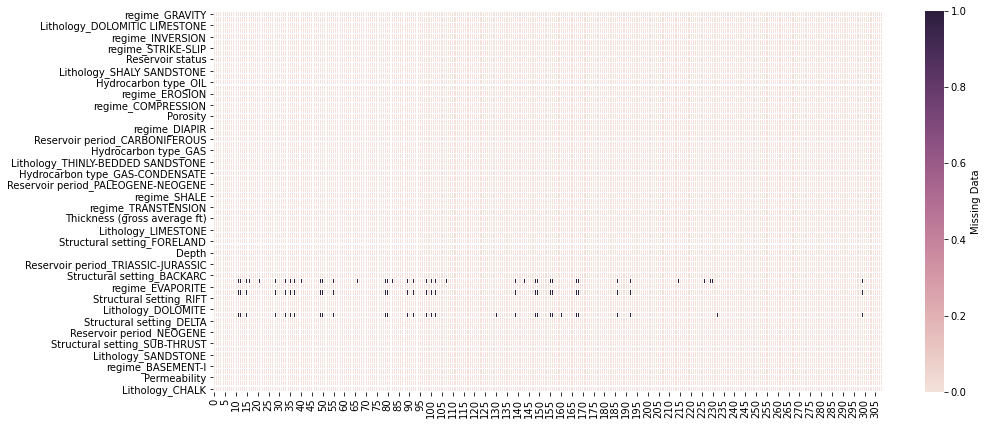

In [15]:
plt.figure(figsize=(15,7))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(train_full.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'}, linewidths=0.05)

<AxesSubplot:>

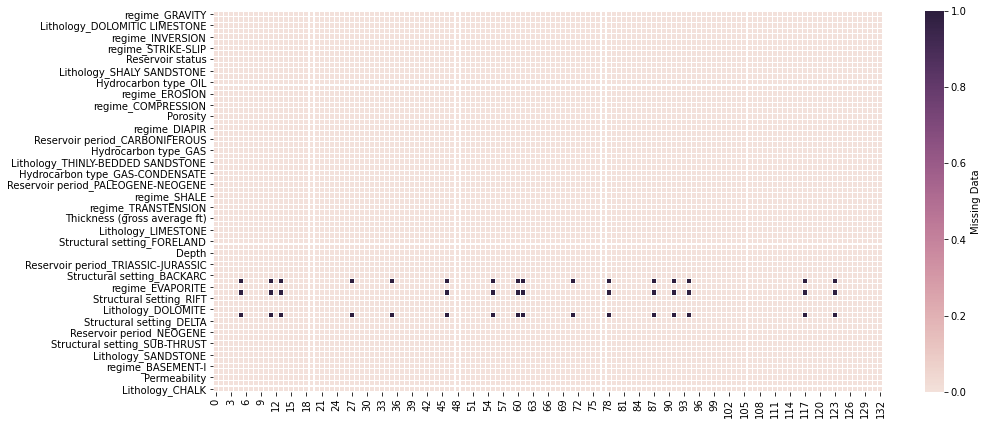

In [16]:
plt.figure(figsize=(15,7))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(test_full.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'}, linewidths=0.05)

Fillmissing data with `KNNImputer` class

In [42]:
from sklearn.impute import KNNImputer

In [43]:
train_full.drop(columns=['Longitude', 'Latitude'], inplace=True)
test_full.drop(columns=['Longitude', 'Latitude'], inplace=True)

In [25]:
%%time
imputer = KNNImputer(n_neighbors=10, weights='distance')
train_df = imputer.fit_transform(train_full)

CPU times: total: 31.2 ms
Wall time: 62.4 ms


In [44]:
train_full = pd.DataFrame(train_df, columns=train_full.columns)
train_full

,Hydrocarbon type_OIL,Lithology_SILTSTONE,regime_INVERSION,regime_EROSION,Structural setting_SALT,Structural setting_SUB-THRUST,Reservoir period_TRIASSIC-JURASSIC,regime_SHALE,Reservoir period_PALEOGENE-NEOGENE,regime_LINKED,...,Structural setting_INVERSION,Lithology_CHALKY LIMESTONE,Porosity,Reservoir status,Region,Lithology_SHALY SANDSTONE,Reservoir period_SILURIAN,Lithology_SANDSTONE,regime_GRAVITY,Reservoir period_PROTEROZOIC
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,24.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23.0,6.0,4.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,21.0,8.0,5.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.8,12.0,6.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,20.0,11.0,6.0,0.0,0.0,1.0,0.0,0.0
306,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,6.0,0.0,0.0,1.0,0.0,0.0
307,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,28.5,6.0,6.0,0.0,0.0,1.0,0.0,0.0


In [45]:
%%time
imputer = KNNImputer(n_neighbors=10, weights='distance')
test_df = imputer.fit_transform(test_full)

CPU times: total: 15.6 ms
Wall time: 18.3 ms


In [46]:
test_full = pd.DataFrame(test_df, columns=test_full.columns)
test_full

,Hydrocarbon type_OIL,Lithology_SILTSTONE,regime_INVERSION,regime_EROSION,Structural setting_SALT,Structural setting_SUB-THRUST,Reservoir period_TRIASSIC-JURASSIC,regime_SHALE,Reservoir period_PALEOGENE-NEOGENE,regime_LINKED,...,Structural setting_INVERSION,Lithology_CHALKY LIMESTONE,Porosity,Reservoir status,Region,Lithology_SHALY SANDSTONE,Reservoir period_SILURIAN,Lithology_SANDSTONE,regime_GRAVITY,Reservoir period_PROTEROZOIC
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,20.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,21.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.5,6.0,2.0,0.0,0.0,0.0,0.0,0.0
129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0
130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,26.7,5.0,2.0,0.0,0.0,1.0,0.0,0.0
131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23.2,2.0,2.0,0.0,0.0,1.0,0.0,0.0


Let's look at distribution of numerical features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='Porosity'>

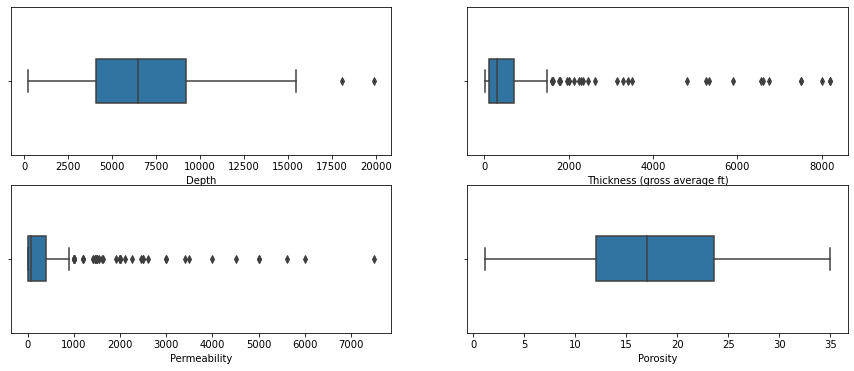

In [132]:
fig, axes = plt.subplots(2, 2, figsize=(15,6))  

sns.boxplot(train['Depth'], ax=axes[0, 0], width=0.3)
sns.boxplot(train['Thickness (gross average ft)'], ax=axes[0, 1], width=0.3)
sns.boxplot(train['Permeability'], ax=axes[1,0], width=0.3)
sns.boxplot(train['Porosity'], ax=axes[1, 1], width=0.3)

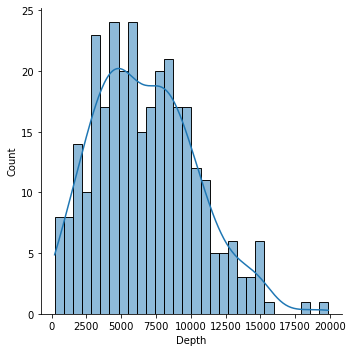

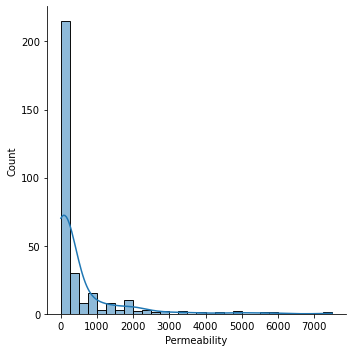

In [138]:
sns.displot(train['Depth'], bins=30, kde=True)
sns.displot(train['Permeability'], bins=30, kde=True)

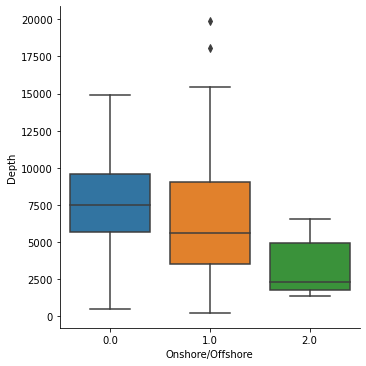

In [144]:
sns.catplot(y='Depth', x='Onshore/Offshore', data=train, kind='box')

In [23]:
#sns.pairplot(train[['Depth', 'Thickness (gross average ft)', 'Thickness (net pay average ft)',
#                    'Porosity', 'Permeability', 'Onshore/Offshore']], hue='Onshore/Offshore', palette='rocket')

In [24]:
#fig, ax = plt.subplots(1,2, figsize=(15, 7))

#sns.countplot(train['Hydrocarbon type'], ax=ax[0], palette='hls')
#sns.countplot(train['Onshore/Offshore'], ax=ax[1], palette='hls')

In [48]:
# sns.countplot(test['Hydrocarbon type'], palette='hls')

In [26]:
#sns.set(rc = {'figure.figsize':(45,45)})

#sns.heatmap(train.corr(), annot=True, fmt linecolor='white', linewidths=1, cmap='YlGnBu');

## Training model

For Classifier model let's select `RandomForestClassifier` and `DecisionTreeClassifier`

In [49]:
from sklearn.model_selection import train_test_split

X = train_full.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (216, 65), (216,)
Test dataset size: (93, 65), (93,)


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

clf = RandomForestClassifier(random_state=42, max_depth=6)

clf.fit(X_train, y_train)
answ = clf.predict(X_test)

print(accuracy_score(y_test, answ))

0.9032258064516129


In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': range(10, 101, 10),
              'max_depth': range(1, 13, 2),
              'min_samples_leaf': range(1, 8),
              'min_samples_split': range(2, 10, 2)}

Finding the best estimator

In [56]:
%%time
clf = RandomForestClassifier(random_state=42, criterion='entropy')
grid = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


CPU times: total: 45.7 s
Wall time: 1min 58s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 101, 10)})

In [57]:
grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 10}

In [58]:
grid.best_score_

0.8290697674418605

In [59]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=6, n_estimators=10, random_state=42)

In [62]:
clf = RandomForestClassifier(criterion='gini', max_depth=11, n_estimators=50, random_state=42)

clf.fit(X_train, y_train)
answ = clf.predict(X_test)

print(accuracy_score(y_test, answ))
# fig, ax = plt.subplots(figsize=(5, 5))

# plot_confusion_matrix(clf, X_test, y_test, ax=ax, colorbar=True, cmap=plt.cm.Blues)  
# plt.show()

0.9032258064516129


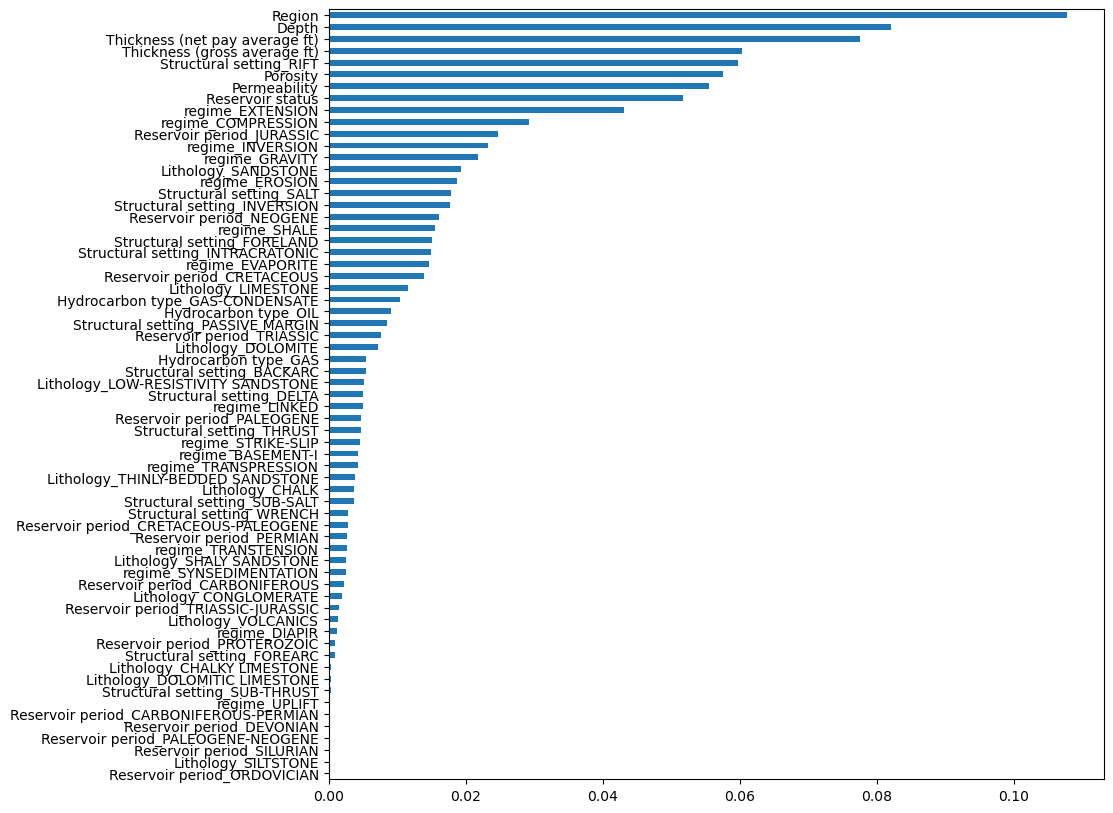

In [63]:
importances = clf.feature_importances_

forest_importances = pd.Series(importances, index=X.columns)

forest_importances = forest_importances.sort_values()

plt.figure(figsize=(10,10))
forest_importances.plot(kind='barh')
plt.show()

In [64]:
print('All features ', len(forest_importances))
print('Usefull features', len(forest_importances[forest_importances > 0.001]))
print('Super Usefull features', len(forest_importances[forest_importances > 0.01]))

All features  65
Usefull features 53
Super Usefull features 25


Now we creating 2 models with defferent count of features from previous step

In [65]:
train_full_1 = train_full[forest_importances[forest_importances > 0.001].index]
test_full_1 = test_full[forest_importances[forest_importances > 0.001].index]

X_1 = train_full_1.copy()

train_full_2 = train_full[forest_importances[forest_importances > 0.01].index]
test_full_2 = test_full[forest_importances[forest_importances > 0.01].index]

X_2 = train_full_2.copy()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=42)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

model = RandomForestClassifier(criterion='gini', max_depth=4, n_estimators=50, random_state=42)

model.fit(X_train, y_train)
answ = model.predict(X_test)

print(accuracy_score(y_test, answ))

Train dataset size: (216, 53), (216,)
Train dataset size: (93, 53), (93,)
0.8817204301075269


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=42)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

model = RandomForestClassifier(criterion='gini', max_depth=10, n_estimators=50, random_state=42)

model.fit(X_train, y_train)
answ = model.predict(X_test)

print(accuracy_score(y_test, answ))

Train dataset size: (216, 25), (216,)
Train dataset size: (93, 25), (93,)
0.8924731182795699


In [68]:
mapping = {0: 'OFFSHORE', 1: 'ONSHORE', 2: 'ONSHORE-OFFSHORE'}

In [69]:
# first model
y_test_pred = clf.predict(test_full)

y_pred_test = pd.DataFrame(y_test_pred, columns=['Onshore/Offshore'])
y_pred_test = y_pred_test.reset_index()

y_pred_test['Onshore/Offshore'] = y_pred_test['Onshore/Offshore'].map(mapping).fillna(y_pred_test['Onshore/Offshore'])

y_pred_test.to_csv("solution.csv", index=False)

In [70]:
# second model
y_test_pred = model.predict(test_full_2)

y_pred_test = pd.DataFrame(y_test_pred, columns=['Onshore/Offshore'])
y_pred_test = y_pred_test.reset_index()

y_pred_test['Onshore/Offshore'] = y_pred_test['Onshore/Offshore'].map(mapping).fillna(y_pred_test['Onshore/Offshore'])

y_pred_test.to_csv("solution.csv", index=False)